<a href="https://colab.research.google.com/github/dduniverse/ML-study/blob/main/12_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-평균 군집화; K-means Clustering
비지도학습의 대표적인 알고리즘으로 목표 변수가 없는 상태에서 데이터를 비슷한 유형끼리 묶어내는 머신러닝 기법
- KNN과 비슷하게 거리 기반으로 작동하며 적절한 K값을 사용자가 지정해야 함
- 클러스터링은 데이터를 적절한 수의 그룹으로 나누고 그 특징을 살펴볼 수 있는 장점이 있음
- 여러 클러스터링 기법 중에서도 K-평균 군집화는 가장 보편적이고 무난하게 사용됨

|장점|단점|
|---|---|
|구현이 비교적 간단함|최적의 k값을 자동으로 찾지 못하고 사용자가 직접 선택해야 함|
|클러스터링 결과를 쉽게 해석할 수 있음|거리 기반 알고리즘이기 때문에, 변수의 스케일에 따라 다른 결과를 나타낼 수 있음


- 종속변수가 없는 데이터셋에서 데이터 특성을 비교적 간단하게 살펴보는 용도로 활용할 수 있음
- 마케팅이나 제품 기획 등을 목적으로 고객 분류에 사용할 수 있음
- 지도 학습에서 종속변수를 제외하고 사용하면, 탐색적 자료 분석 혹은 피처 엔지니어링 용도로 사용할 수 있음

## 연습용 데이터

### 1. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<Axes: xlabel='var_1', ylabel='var_2'>

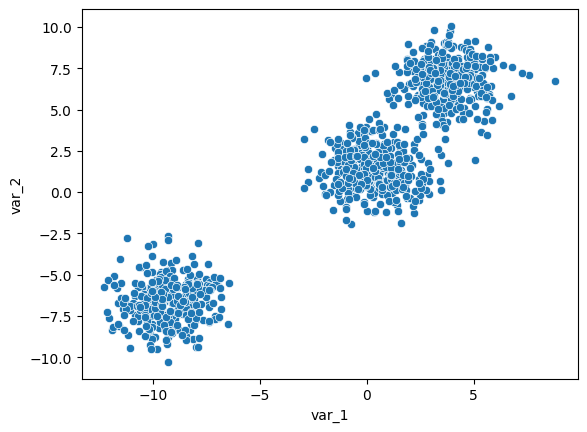

In [3]:
sns.scatterplot(x='var_1', y='var_2', data=data)  # 산점도

한눈에 보기에도 데이터가 크게 3가지 그룹으로 나뉘어 보임

이 데이터를 K-means Clustering을 이용해 3개 그룹으로 나누기

### 2. 연습용 데이터 모델링 및 평가

In [4]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=100)  # 모델
kmeans_model.fit(data)  # 학습
kmeans_model.predict(data)  # 예측

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [5]:
data['label'] = kmeans_model.predict(data)  # 예측값 저장

<Axes: xlabel='var_1', ylabel='var_2'>

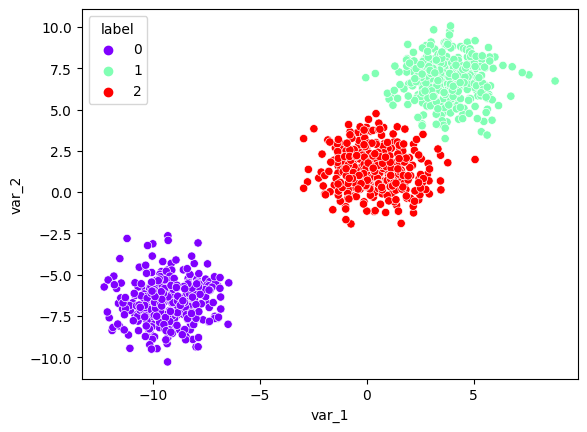

In [6]:
sns.scatterplot(x='var_1', y='var_2', data=data, hue='label', palette='rainbow')  # 산점도

### 3. 엘보우 기법으로 최적의 K값 구하기
엘보우 기법(elbow method)
- 최적의 클러스터 개수를 확인하는 방법으로, 클러스터의 중점과 각 데이터간의 거리를 기반으로 계산함

이너셔(inertia)
- 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합


연습 데이터는 한 눈에 보기에도 데이터가 3개의 무리로 구성되어 있어 K를 손쉽게 3으로 지정할 수 있지만, 실제 상황에서는 변수가 너무 많아 그래프로 확인하기 어려울 뿐더러, 사람의 눈으로 보기에 정확하게 몇 개의 그룹인지 구분이 애매함
- 사람의 눈에 의존해 적절한 K값을 찾는데 한계가 있음 → `엘보우 기법`을 활용
- 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합, `이너셔`를 계산함
- 모델이 학습을 할 때 자동적으로 이너셔값을 계산하기 때문에 `inertia_`로 확인할 수 있음

In [7]:
kmeans_model.inertia_  # 이너셔

3090.03323707666

이너셔값은 클러스터의 중점과 데이터 간의 거리이기 때문에 작을 수록 그룹별로 더 잘 모이게 분류됐다고 할 수 있음
- K값이 커지면 거리의 합인 이너셔는 필연적으로 작아지게 됨

In [8]:
temp_model = KMeans(n_clusters=500, random_state=100)
temp_model.fit(data)
temp_model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6.22354210658421

K=3일 때 3090이던 값이 K=500이 되니 6으로 작아짐

클러스터링에는 클러스터 수를 가급적 적게 유지하면서, 동시에 거리의 합이 어느정도 작은, 즉 적절한 K값이 필요함
- 이에 대한 솔루션으로 엘보우 기법을 사용함
- 다양한 K를 넣어 모델링해보고 각각에 대한 이너셔를 구한 뒤, 이를 그림으로 풀어 적절한 K값을 ㅏㅊㅈ아냄

In [9]:
# 2부터 10까지의 K를 넣어 이너셔 저장
distance = []
for k in range(2, 10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(data)
  distance.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
distance

[9908.551424778394,
 3090.03323707666,
 2722.116201293762,
 2382.202884583966,
 2049.219361151966,
 1828.0083798838696,
 1595.543174733291,
 1373.8857171311465]

<Axes: >

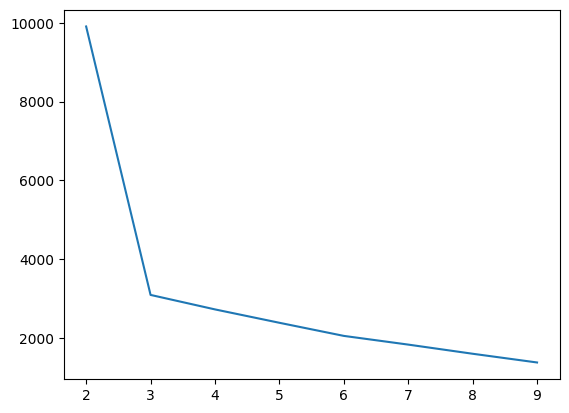

In [11]:
sns.lineplot(x=range(2, 10), y=distance)  # 엘보우 그래프

K값이 커질수록 distance는 점점 작아지는 모양임
- K=3 지점에서 y가 크게 감소하고, 그 이후로는 조금씩 감소함
- 사람의 팔을 100도 정도로 접은 모습과 유사하며, K=3 지점이 팔꿈치를 연상하기 떄문에 엘보우 기법이라고 부름

엘보우 기법은 이와 같이 distance가 급격히 줄어드는 K값을 포착하여 최적의 K값을 찾도록 도와주는 방법론임

## 데이터 불러오기: 고객 데이터셋

In [12]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv'
customer = pd.read_csv(file_url)
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


- cc_num: 카드번호
- cateogry: 번주
- amt: 거래 금액

In [13]:
customer['cc_num'].nunique()

100

In [14]:
customer['category'].nunique()

11

고객 100명, 11개의 범주에 대한 데이터임을 알 수 있음

## 전처리: 피처 엔지니어링

In [15]:
customer_dummy = pd.get_dummies(customer, columns=['category'])  # 더미 변환
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


범주별로 얼마만큼의 금액을 썼는지 계산하기 위해, 더미 변수로 변환된 영역에 amt 값을 곱함
- 1인 영역에만 계산이 되어 자연스럽게 사용된 변수에 금액이 들어감

In [16]:
cat_list = customer_dummy.columns[2:]  # 더미 변환된 변수 이름
for i in cat_list:
  customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']  # 금액으로 변수 업데이트

customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.97,0.0,0.0,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.0,0.0,0.0,41.96,0.0,0.0,0.0


각 고객별로 데이터를 정리하기 위해 `groupby()` 함수 사용
- 고객별 총 사용 금액 및 범주별 사용 금액

In [17]:
customer_agg = customer_dummy.groupby('cc_num').sum()  # 고객 별 총 거래 금액
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


K-평균 군집화는 거리 기반 알고리즘이기 때문에 데이터의 스케일에 영향을 받음
- StandardScaler 사용

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), columns=customer_agg.columns, index=customer_agg.index)  # 스케일링 후 데이터 프레임으로 변환

In [19]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


다른 고객들과 비슷한 수준이면(=평균에 가까울 경우) 0에 근접한 값을 보여주고, 더 많이 사용했으면 더 큰 양수를, 더 적게 사용했으면 더 작은 음수를 가짐

## 데이터 모델링 및 실루엣 계수

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

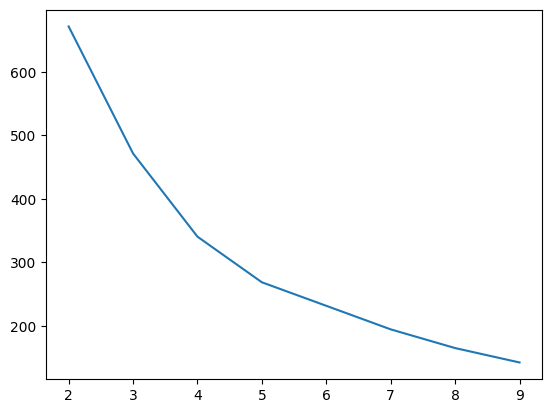

In [20]:
distance = []
for k in range(2, 10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  distance.append(k_model.inertia_)

sns.lineplot(x=range(2, 10), y=distance)

어느 한 지점에서 크게 떨어지지 않고 비교적 완만하게 그래프가 내려가 K값을 결정하기 어려움
- 대안으로 실루엣 계수를 사용할 수 있음
- 실루엣 계수: 클러스터 내부에서의 평균 거리와, 최근접한 다른 클러스터 데이터와의 평군 거리도 점수에 반영함


**실루엣 계수(silhouette coefficient)**
- 엘보우 기법과 같이 최적의 클러스터 수를 찾는 방법
- 높은 값일수록 더 좋은 분류의 의미
- 엘보우 기법에서 적절한 클러스터 수를 찾지 못했을 대 대안으로 사용
- 엘보우 기법보다 계산 시간이 오래 걸리는 단점 존재


In [21]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

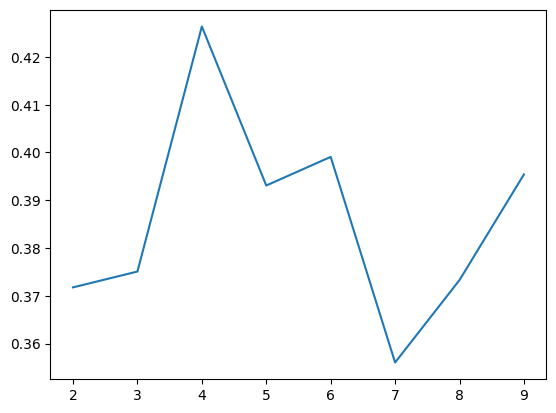

In [22]:
silhouette = []
for k in range(2, 10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  silhouette.append(silhouette_score(scaled_df, labels))  # 실루엣 계수 리스트에 추가

sns.lineplot(x=range(2, 10), y=silhouette)

실루엣 계수에서는 높은 값일수록 더 좋은 분류를 의미하므로 여기에서는 명확하게 K=4일 때 가장 좋은 분류 성능을 나타냄
- 실루엣 계수는 계산 비용이 상대적으로 크기 때문에
- 엘보우 기법을 우선 활용하되, 적절한 K값을 찾기 어려울 때 실루엣 계수를 사용해야 함

## 최종 예측 모델 및 결과 해석

In [23]:
k_model = KMeans(n_clusters=4)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
scaled_df['label'] = labels

In [25]:
scaled_df_mean = scaled_df.groupby('label').mean()  # label별 평균값
scaled_df_count = scaled_df.groupby('label').count()['category_travel']  # label별 등장 횟수

In [26]:
scaled_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840
1,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970


In [27]:
scaled_df_count

label
0    46
1    36
2    10
3     8
Name: category_travel, dtype: int64

In [28]:
scaled_df_count = scaled_df_count.rename('count')  # join 함수 사용 시 같은 컬럼이 존재하면 에러가 발생하므로 이름 변경

In [29]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840,46
1,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604,36
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8


- 클러스터 0인 그룹은 전체 지출액부터 각 범주의 금액까지 모두 타 클러스터에 비해 낮음 - 46명(지출이 낮은 일반 고객군)
- 클러스터 1인 그룹은 gas_transport에서 상대적으로 조금 높은 지출을 보이지만, 전체 지출 및 각 범주에서 대부분 0에 가까운 숫자를 보여줌 - 36명(특징이 없는 일반 고객군)
- 클러스터 2인 그룹은 전체 지출금액부터 대다수의 범주에서 높은 지출을 보여줌 - 10명(상위 10%의 VIP 고객)
- 클러스터 3인 그룹은 health, home, travel에서 다른 클러스터보다 지출이 높으며, 특히 travel이 굉장히 높게 나옴 - 8명(여행에 관심이 많은 고객군)